# Elijah Walker
## ANA500 Microproject 1

# Step 1: Acquire (and import libraries)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix, average_precision_score
from sklearn.tree import plot_tree
# import tensorflow as tf # Troubleshooting this module to work on apple M1


# Step 2: Prepare

In [4]:
mushroom_data = './mushrooms.csv'

df = pd.read_csv(mushroom_data)

In [2]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
value_counts_dict = {}

# Iterate through each column
for col in df.columns:
    value_counts = df[col].value_counts()
    value_counts_dict[col] = value_counts

# Convert the dictionary to a DataFrame
value_counts_df = pd.DataFrame(value_counts_dict)

value_counts_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,400.0,210.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.0,NaN
b,NaN,452.0,NaN,168.0,NaN,NaN,NaN,NaN,5612.0,1728.0,...,NaN,432.0,432.0,NaN,NaN,NaN,NaN,48.0,NaN,NaN
c,NaN,4.0,NaN,44.0,NaN,192.0,NaN,6812.0,NaN,NaN,...,NaN,36.0,36.0,NaN,NaN,NaN,NaN,NaN,340.0,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3148.0
e,4208.0,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,96.0,...,NaN,96.0,96.0,NaN,NaN,NaN,2776.0,NaN,NaN,NaN
f,NaN,3152.0,2320.0,NaN,4748.0,2160.0,7914.0,NaN,NaN,NaN,...,600.0,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN
g,NaN,NaN,4.0,1840.0,NaN,NaN,NaN,NaN,NaN,752.0,...,NaN,576.0,576.0,NaN,NaN,NaN,NaN,NaN,NaN,2148.0
h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1632.0,NaN,NaN
k,NaN,828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408.0,...,2304.0,NaN,NaN,NaN,NaN,NaN,NaN,1872.0,NaN,NaN


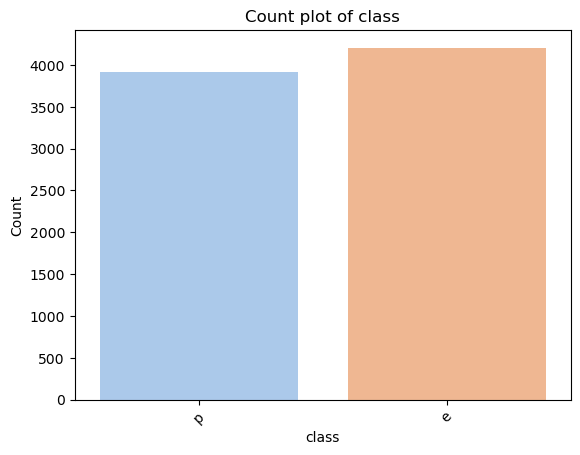

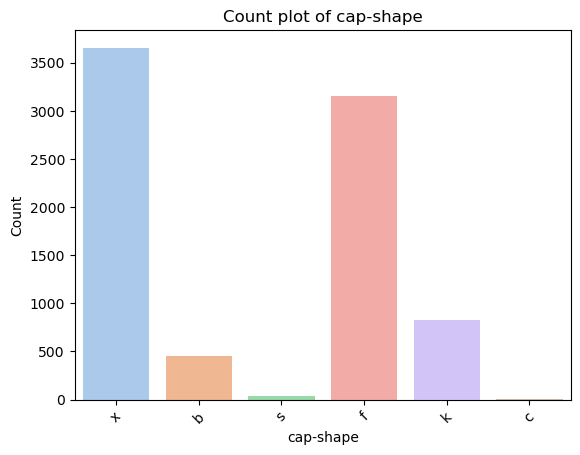

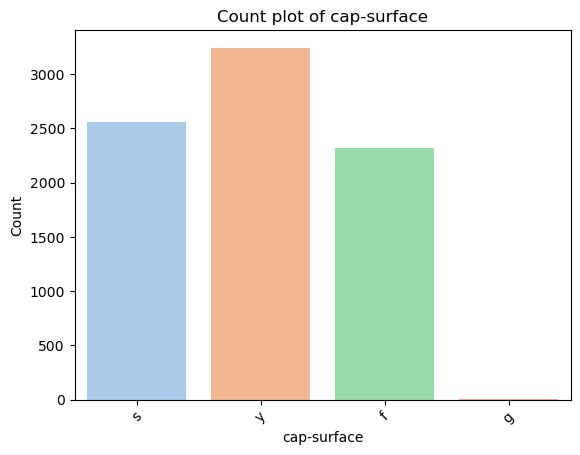

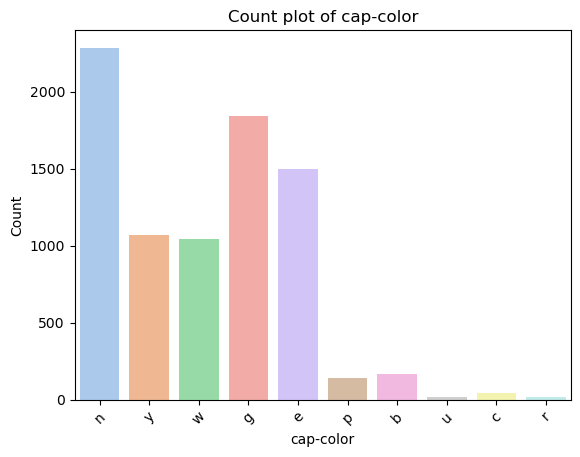

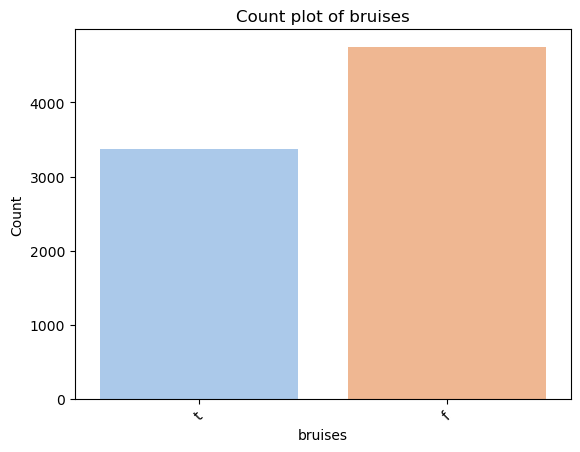

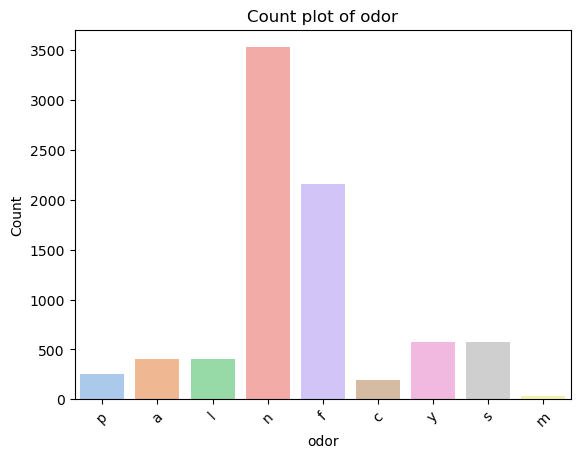

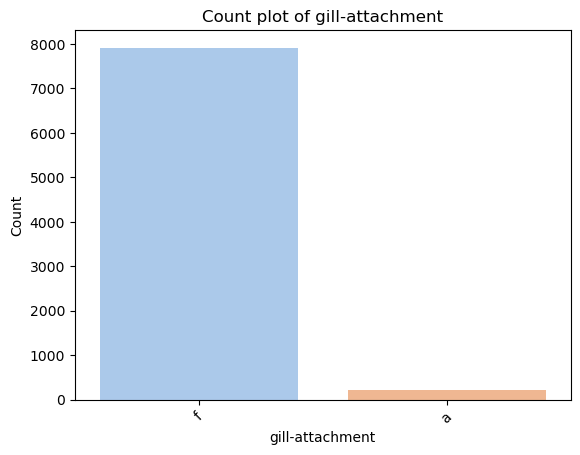

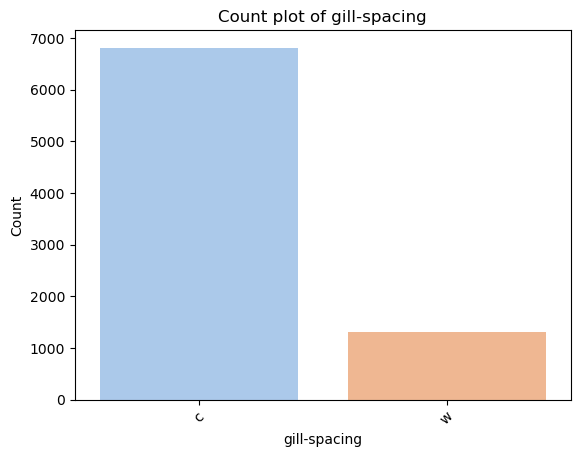

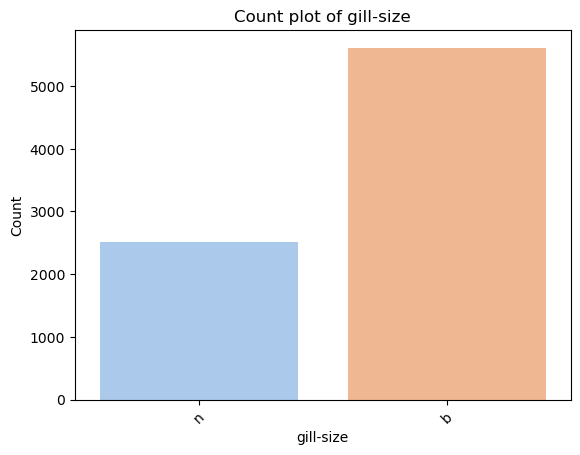

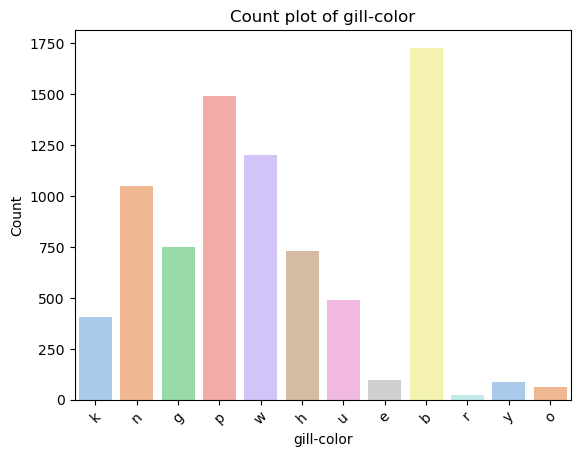

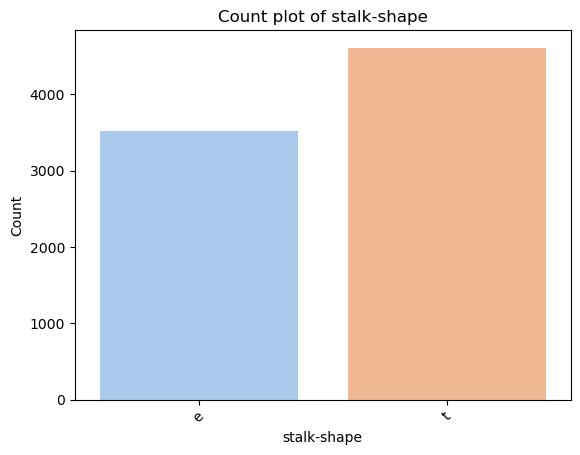

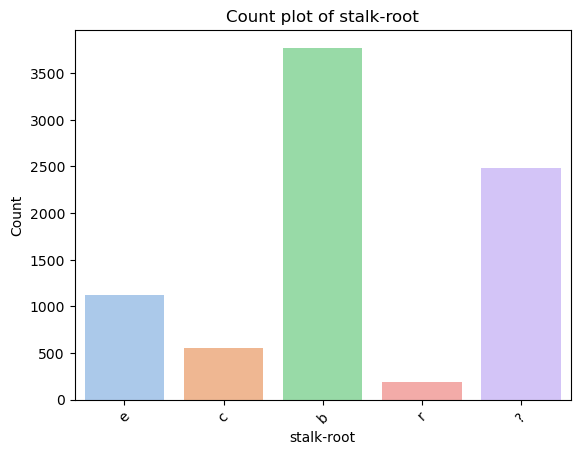

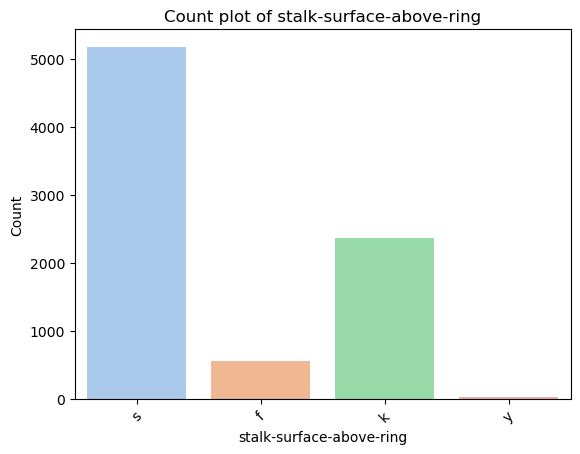

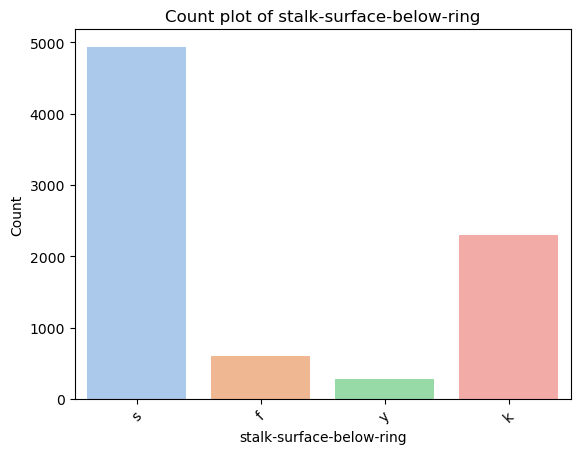

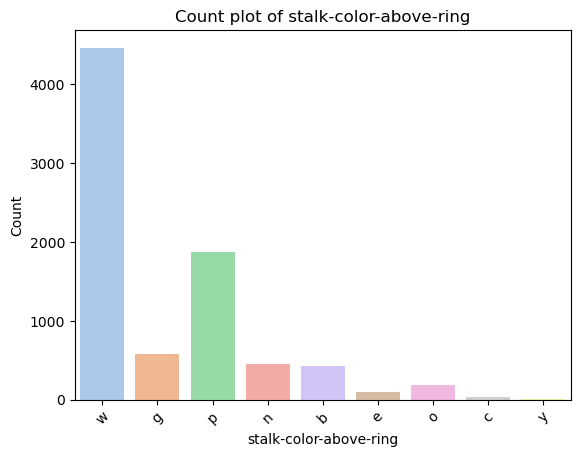

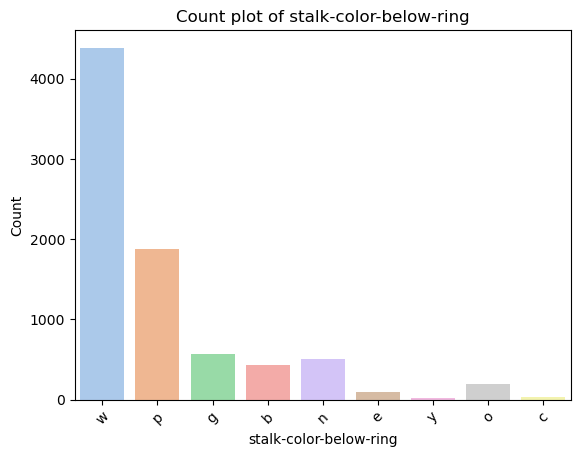

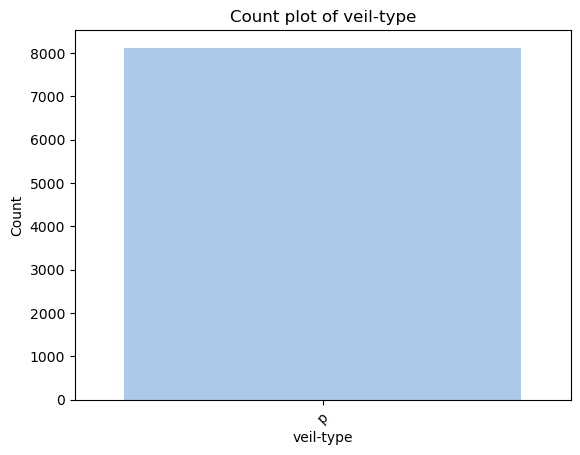

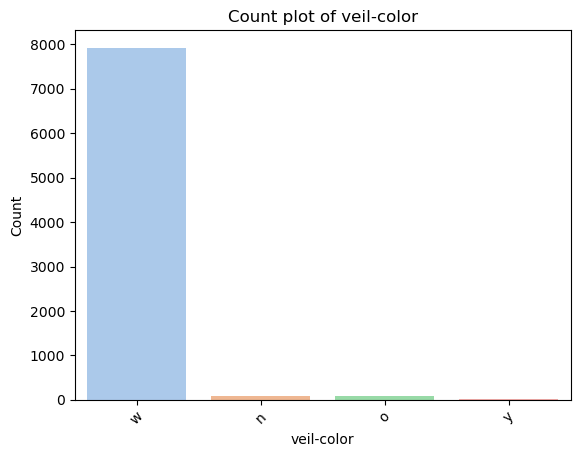

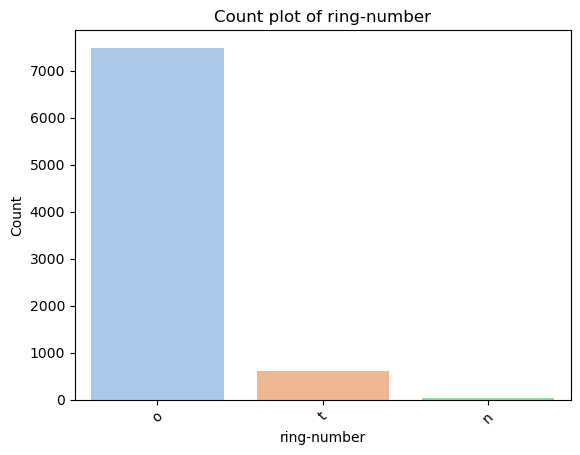

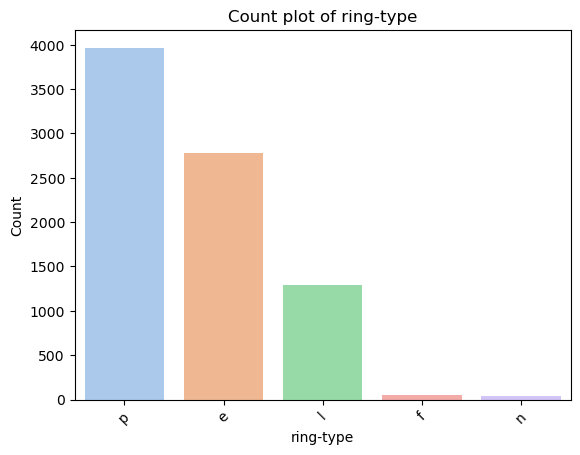

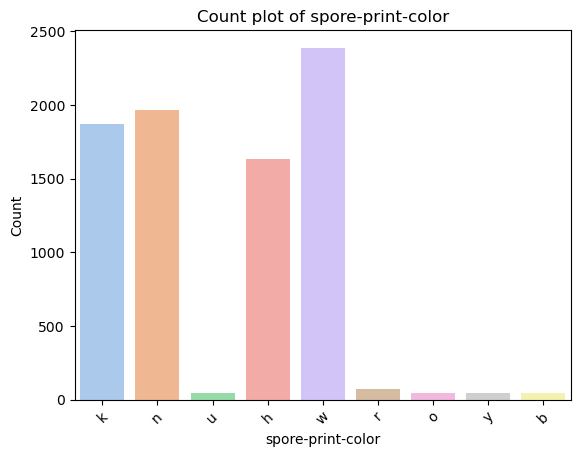

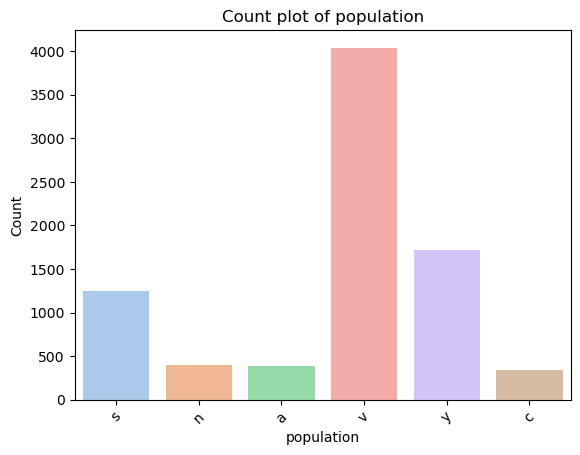

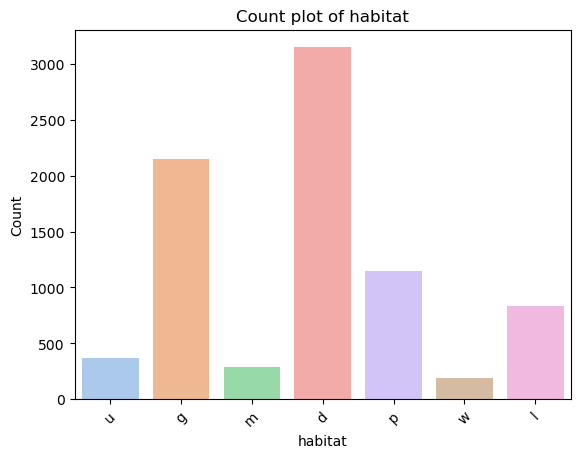

In [7]:
sns.set_palette("Set2")
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure()
        sns.countplot(x=column, data=df, palette='pastel')
        plt.title(f'Count plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

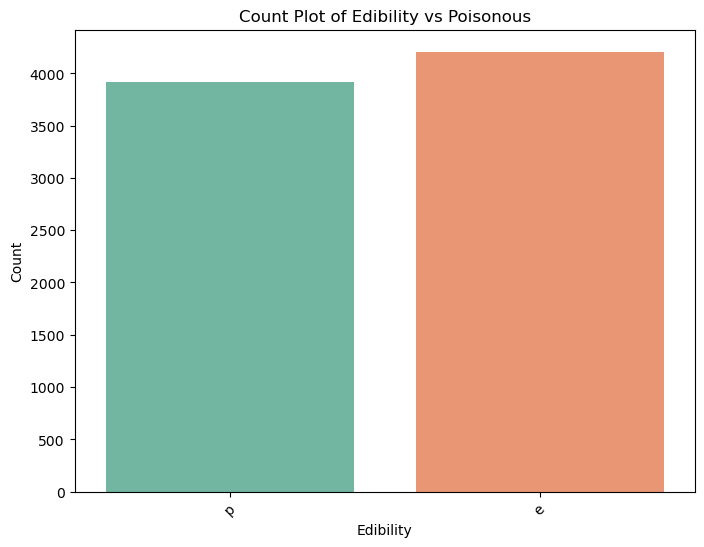

In [8]:
# Count plot for Target Variable Class
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Count Plot of Edibility vs Poisonous')
plt.xlabel('Edibility')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

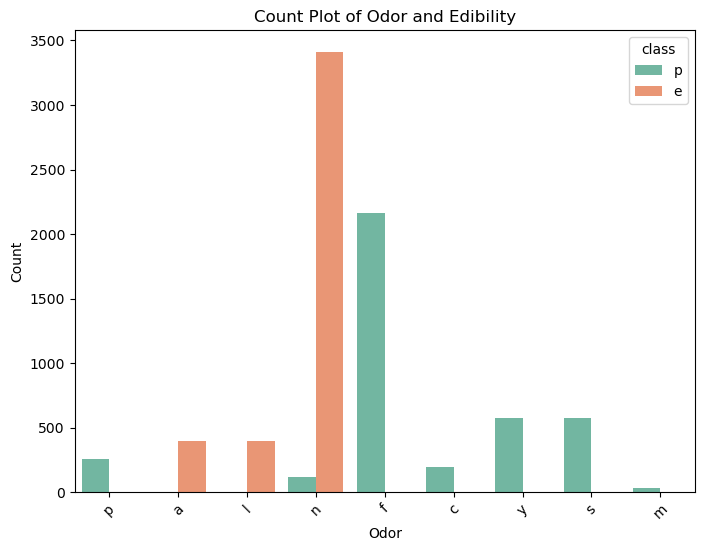

In [9]:
# Count plot for Odor
plt.figure(figsize=(8, 6))
sns.countplot(x='odor', hue='class', data=df)
plt.title('Count Plot of Odor and Edibility')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

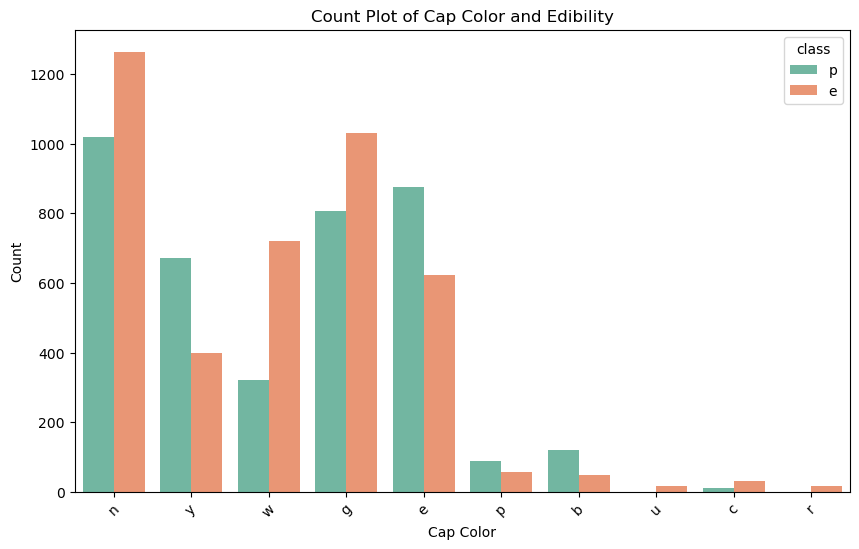

In [10]:
# Count plot for Cap Color
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-color', hue='class', data=df)
plt.title('Count Plot of Cap Color and Edibility')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

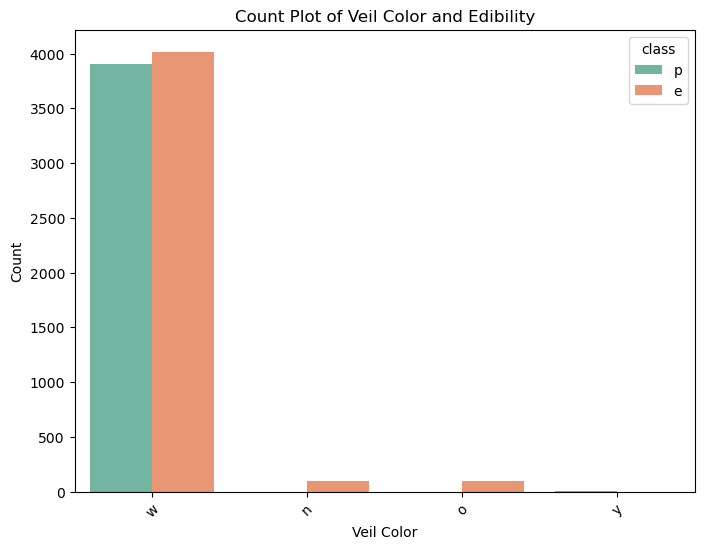

In [11]:
# Count plot for Veil Color (assuming more than one color is available)
plt.figure(figsize=(8, 6))
sns.countplot(x='veil-color', hue='class', data=df)
plt.title('Count Plot of Veil Color and Edibility')
plt.xlabel('Veil Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

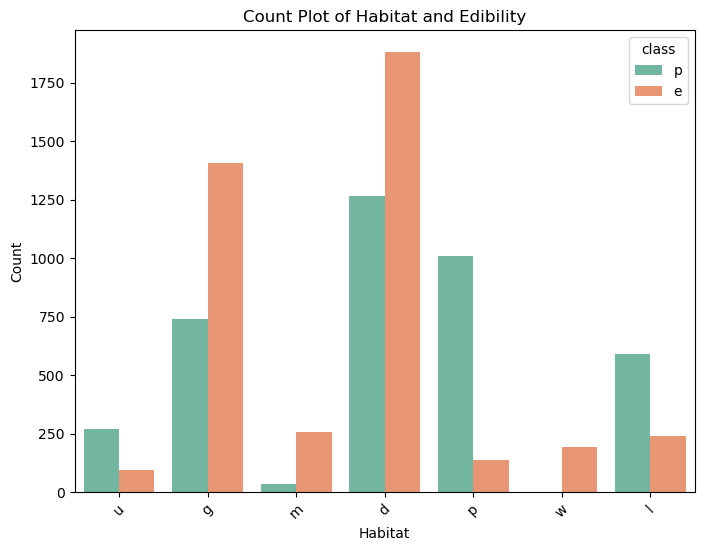

In [12]:
# Count plot for Habitat
plt.figure(figsize=(8, 6))
sns.countplot(x='habitat', hue='class', data=df)
plt.title('Count Plot of Habitat and Edibility')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Analyze

In [44]:
selected_attributes = ["veil-color", "habitat", "cap-color", "odor"]
X = df[selected_attributes]
y = df["class"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Encode categorical attributes
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Build and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions with Naive Bayes
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)



# Print and report results
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", report_nb)


Naive Bayes Accuracy: 0.5052307692307693
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.05      0.09       843
           1       0.49      1.00      0.66       782

    accuracy                           0.51      1625
   macro avg       0.73      0.52      0.38      1625
weighted avg       0.74      0.51      0.36      1625



In [46]:


encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# One-hot encode categorical variables using dummy variables
X_encoded = pd.get_dummies(X_encoded, columns=X_encoded.columns, drop_first=True)

# Build and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

# Print and report results
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Classification Report:\n", report_logreg)

Logistic Regression Accuracy: 0.6535384615384615
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       843
           1       0.69      0.51      0.59       782

    accuracy                           0.65      1625
   macro avg       0.66      0.65      0.64      1625
weighted avg       0.66      0.65      0.65      1625



In [47]:
coefficients = logreg.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display coefficients in descending order of impact
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df)

      Feature  Coefficient
0  veil-color     3.274192
1     habitat     0.273464
2   cap-color    -0.073897
3        odor    -0.119059


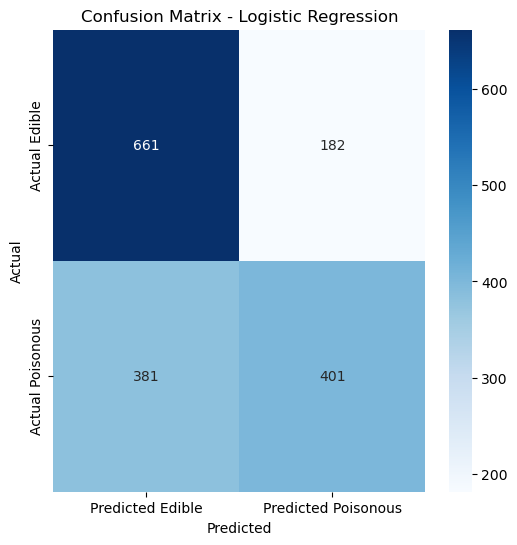

In [48]:
# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_logreg, annot=True, cmap='Blues', fmt='d', 
            xticklabels=["Predicted Edible", "Predicted Poisonous"],
            yticklabels=["Actual Edible", "Actual Poisonous"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

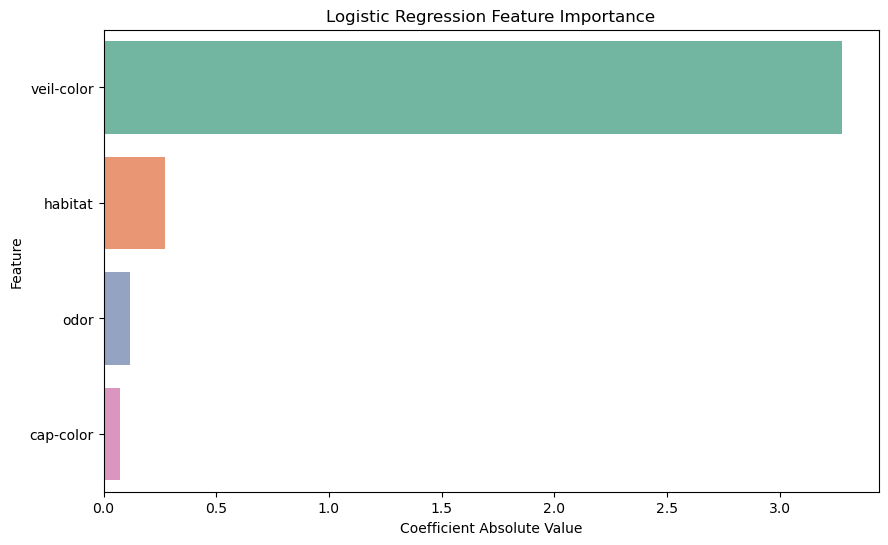

In [57]:
coef_abs = abs(logreg.coef_[0])  # Absolute values of coefficients
sorted_indices = coef_abs.argsort()[::-1]  # Sort indices in descending order
sorted_features = [X_train.columns[i] for i in sorted_indices]
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_abs[sorted_indices], y=sorted_features)
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Coefficient Absolute Value")
plt.ylabel("Feature")
plt.show()

In [50]:
# y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of positive class
# plt.figure(figsize=(8, 6))
# sns.histplot(y_pred_prob, bins=20, kde=True)
# plt.title("Distribution of Predicted Probabilities")
# plt.xlabel("Predicted Probability")
# plt.ylabel("Frequency")
# plt.show()


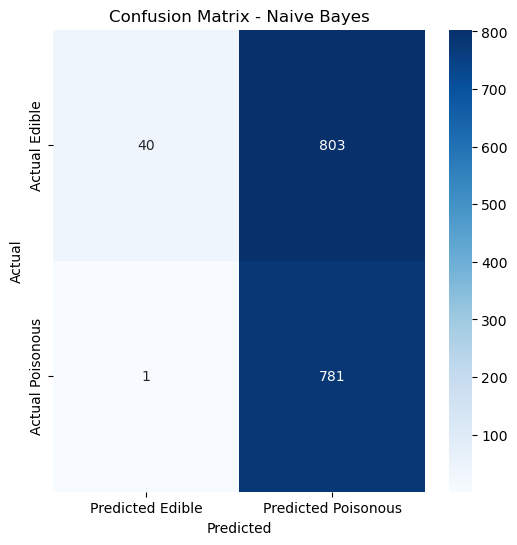

In [51]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='d', 
            xticklabels=["Predicted Edible", "Predicted Poisonous"],
            yticklabels=["Actual Edible", "Actual Poisonous"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
class_priors = nb_classifier.class_prior_
class_features = nb_classifier.theta_

# Display class priors and conditional probabilities
for i, class_name in enumerate(nb_classifier.classes_):
    print(f"Class: {class_name}")
    print("Class Prior:", class_priors[i])
    print("Conditional Probabilities for Features:")
    for feature, conditional_prob in zip(X_train.columns, class_features[i]):
        print(f"{feature}: {conditional_prob:.4f}")
    print()

Class: e
Class Prior: 0.5177719649176796
Conditional Probabilities for Features:
veil-color_1: 1.9305
veil-color_2: 1.1536
veil-color_3: 4.5845
habitat_1: 4.3421

Class: p
Class Prior: 0.48222803508232037
Conditional Probabilities for Features:
veil-color_1: 2.0022
veil-color_2: 1.8963
veil-color_3: 4.4301
habitat_1: 3.9340



# Micro Project 3 - Adding Machine Learning Algorithms, and cross-validation to avoid overfitting.

In [62]:
model = LogisticRegression(max_iter=1000)
model2 = LogisticRegression(penalty='l2', max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
scores2 = cross_val_score(model2, X_train, y_train, cv=5)  # Validation with regularization
average_accuracy_cv = scores.mean()
average_accuracy_reg = scores2.mean()
print(f'Average Cross-Validation Accuracy: {average_accuracy:.4f}')
print(f'Average Cross-Validation Accuracy with regularization: {average_accuracy:.4f}')

Average Cross-Validation Accuracy: 0.9866
Average Cross-Validation Accuracy with regularization: 0.9866


# Support Vectors

In [53]:
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Initialize and train an SVM model with cross-validation and hyperparameter tuning
model = GridSearchCV(SVC(), param_grid, cv=5)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Best Parameters: {model.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.9957
Confusion Matrix:
[[843   0]
 [  7 775]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       843
           1       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Random Forests

In [63]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5,
                                  min_samples_leaf=2, random_state=42)

# Perform cross-validation to evaluate the model's performance
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
average_accuracy_cv = scores.mean()

# Fit the model on the entire training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Average Cross-Validation Accuracy: {average_accuracy_cv:.4f}')
print(f'Random Forest Accuracy: {accuracy:.4f}')

Average Cross-Validation Accuracy: 0.9968
Random Forest Accuracy: 0.9957


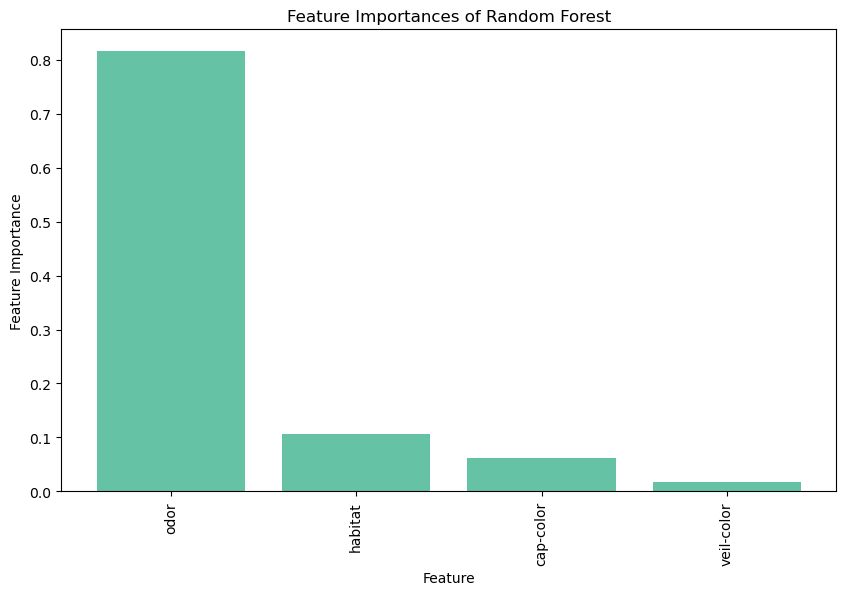

In [55]:
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns.tolist()

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Random Forest')
plt.show()

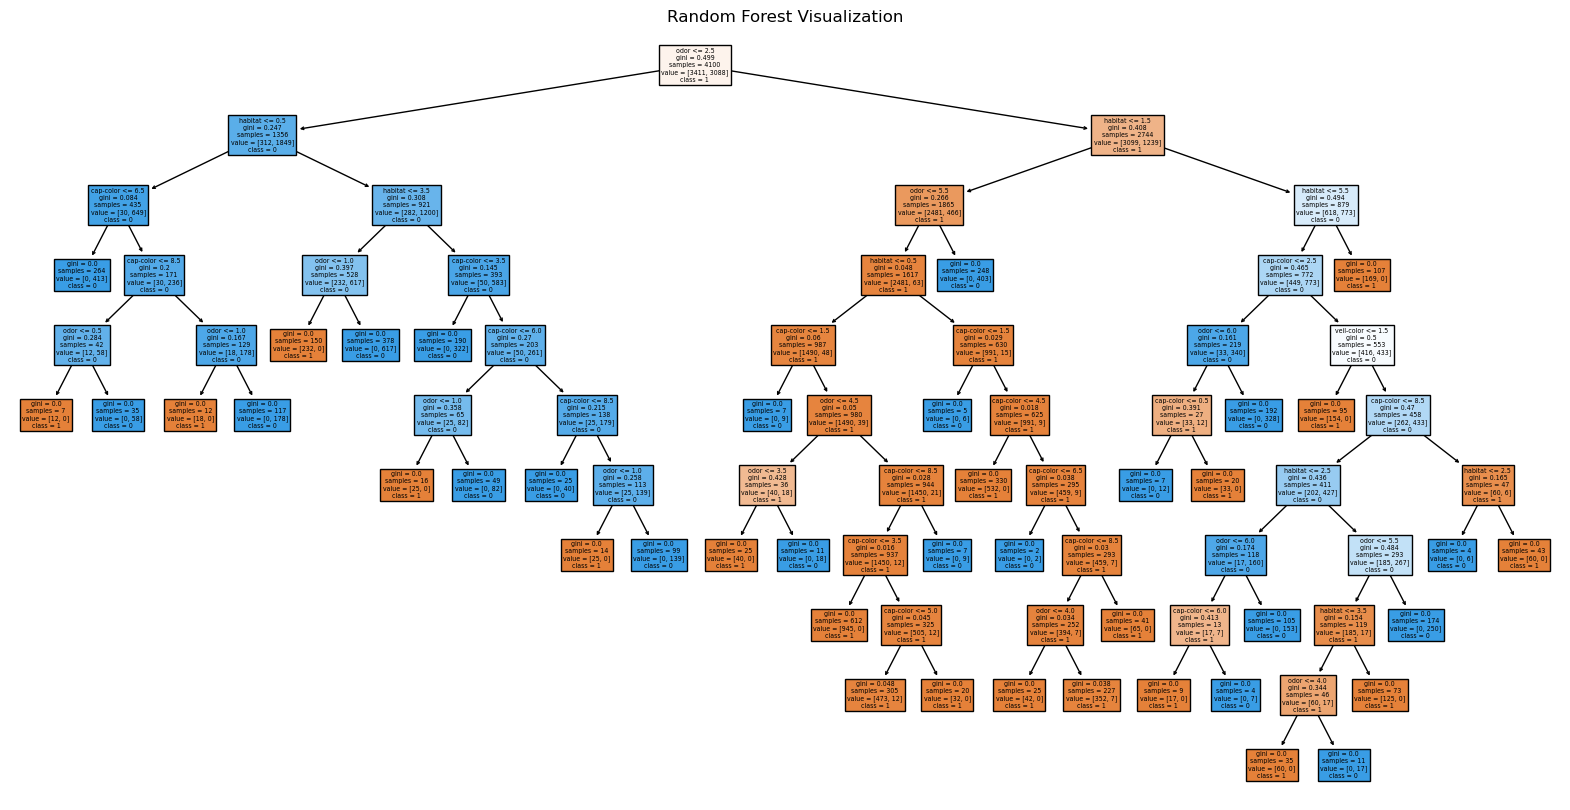

In [56]:
class_names = [str(label) for label in y.unique()]

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns.tolist(), 
          class_names=class_names, filled=True)
plt.title('Random Forest Visualization')
plt.show()


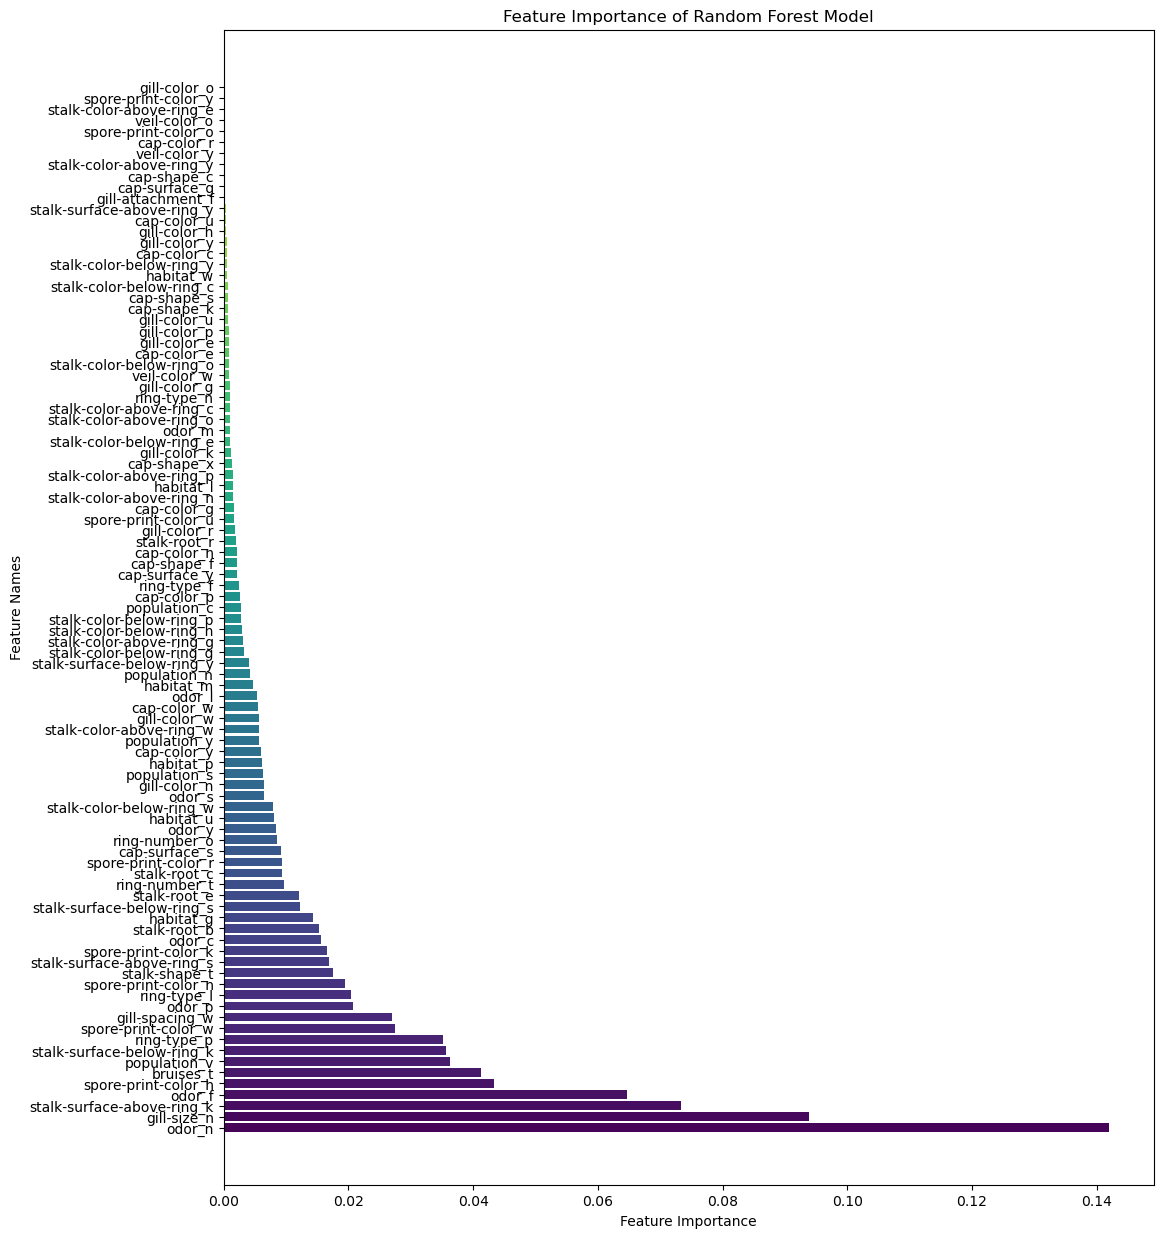

In [12]:

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df_encoded.drop('class_p', axis=1)  # Remove the target column 'class_p'
y = df_encoded['class_p']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns.tolist()

# Create a sorted list of tuples with feature importance and feature name
feature_importance_list = sorted(zip(feature_importances, feature_names), reverse=True)

# Extract feature importance values and feature names for plotting
importance_values = [importance for importance, _ in feature_importance_list]
feature_names = [feature_name for _, feature_name in feature_importance_list]

colors = sns.color_palette("viridis", len(importance_values))

# Create a bar plot to visualize feature importance with colors
plt.figure(figsize=(12, 15))
plt.barh(range(len(importance_values)), importance_values, align='center', color=colors)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance of Random Forest Model')
plt.show()